In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# text mining packages in python
import nltk
import re # import regular expression
from nltk.tokenize import word_tokenize

In [4]:
# to import dataset in
imdb = pd.read_csv('C:/Users/miche/Desktop/machine_learning/IMDB Dataset.csv')

In [5]:
imdb.head()

,doc_id,review
0,1,One of the other reviewers has mentioned that ...
1,2,A wonderful little production. <br /><br />The...
2,3,I thought this was a wonderful way to spend ti...
3,4,Basically there's a family where a little boy ...
4,5,"Petter Mattei's ""Love in the Time of Money"" is..."


In [6]:
# there are no missing values in dataset
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   doc_id  50000 non-null  int64 
 1   review  50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [7]:
# to check for duplicated values in dataset
duplicates = imdb[imdb.duplicated()]

In [8]:
# there are no duplicated rows
duplicates

,doc_id,review


In [9]:
# to import language detection to see if all reviews are all in english or in other languages
from langdetect import detect

In [10]:
# to check for non-English reviews in dataset
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [11]:
imdb['language'] = imdb['review'].apply(language_detection)

In [12]:
# write to csv to avoid long runtime 
imdb.to_csv('C:/Users/miche/Desktop/machine_learning/imdbreviews_v2.csv', index=False)

In [13]:
# to read in the language dataframe
imdb = pd.read_csv('C:/Users/miche/Desktop/machine_learning/imdbreviews_v2.csv')

In [14]:
# to print language count in new dataframe, there is 1 non-English review in datatset
imdb.language.value_counts().head()

language
en    49999
id        1
Name: count, dtype: int64

In [15]:
imdb.language.unique()

array(['en', 'id'], dtype=object)

In [16]:
# to filter out reviews with English language only
imdb = imdb[imdb.language == 'en'].reset_index()
del imdb['index']

In [17]:
# to check unique listings with reviews, 1 non-english reviews have been removed
len(imdb['doc_id'].unique())

49999

In [18]:
imdb.head()

,doc_id,review,language
0,1,One of the other reviewers has mentioned that ...,en
1,2,A wonderful little production. <br /><br />The...,en
2,3,I thought this was a wonderful way to spend ti...,en
3,4,Basically there's a family where a little boy ...,en
4,5,"Petter Mattei's ""Love in the Time of Money"" is...",en


In [19]:
# To create a function to decontract short form words cos it may affect accuracy of sentiment analysis
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "cannot", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [20]:
# to replace short words
imdb['review'] = imdb['review'].map(decontracted)

In [21]:
# to create a new variable 'text_length' from reviews
imdb['text_length'] = [len(x) for x in imdb['review'].str.split(' ')]

In [22]:
imdb.head()

,doc_id,review,language,text_length
0,1,One of the other reviewers has mentioned that ...,en,313
1,2,A wonderful little production. <br /><br />The...,en,163
2,3,I thought this was a wonderful way to spend ti...,en,168
3,4,Basically there's a family where a little boy ...,en,139
4,5,"Petter Mattei's ""Love in the Time of Money"" is...",en,230


In [23]:
# to download rule-based model for general sentiment analysis called VADER
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\miche\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
# to import sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer

In [25]:
# to initialise an object of Sentiment Intensity Analyzer with name 'analyzer'
analyzer = SentimentIntensityAnalyzer()

In [26]:
# using the polarity score method
imdb['polarity'] = imdb['review'].apply(lambda x: analyzer.polarity_scores(x))
imdb.head()

,doc_id,review,language,text_length,polarity
0,1,One of the other reviewers has mentioned that ...,en,313,"{'neg': 0.2, 'neu': 0.752, 'pos': 0.048, 'comp..."
1,2,A wonderful little production. <br /><br />The...,en,163,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co..."
2,3,I thought this was a wonderful way to spend ti...,en,168,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co..."
3,4,Basically there's a family where a little boy ...,en,139,"{'neg': 0.137, 'neu': 0.798, 'pos': 0.065, 'co..."
4,5,"Petter Mattei's ""Love in the Time of Money"" is...",en,230,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co..."


In [27]:
# to transform the data, change the data structure
imdb = pd.concat(
            [imdb.drop(['doc_id','polarity'], axis=1),
            imdb['polarity'].apply(pd.Series)],  axis=1)

In [28]:
# new column: 'compound' is formed
imdb.head(10)

,review,language,text_length,neg,neu,pos,compound
0,One of the other reviewers has mentioned that ...,en,313,0.200,0.752,0.048,-0.9951
1,A wonderful little production. <br /><br />The...,en,163,0.053,0.776,0.172,0.9641
2,I thought this was a wonderful way to spend ti...,en,168,0.094,0.714,0.192,0.9605
3,Basically there's a family where a little boy ...,en,139,0.137,0.798,0.065,-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",en,230,0.052,0.801,0.147,0.9744
5,"Probably my all-time favorite movie, a story o...",en,120,0.017,0.759,0.224,0.9828
6,I sure would like to see a resurrection of a u...,en,151,0.024,0.871,0.104,0.9022
7,"This show was an amazing, fresh & innovative i...",en,175,0.148,0.656,0.196,0.8596
8,Encouraged by the positive comments about this...,en,131,0.166,0.662,0.172,0.2362
9,If you like original gut wrenching laughter yo...,en,33,0.094,0.531,0.375,0.9149


In [29]:
# create new variable 'sentiment' classifying reviews into 'neutral','positive' and 'negative' from values in compound
imdb['sentiment'] = imdb['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
imdb.head(10)

,review,language,text_length,neg,neu,pos,compound,sentiment
0,One of the other reviewers has mentioned that ...,en,313,0.200,0.752,0.048,-0.9951,negative
1,A wonderful little production. <br /><br />The...,en,163,0.053,0.776,0.172,0.9641,positive
2,I thought this was a wonderful way to spend ti...,en,168,0.094,0.714,0.192,0.9605,positive
3,Basically there's a family where a little boy ...,en,139,0.137,0.798,0.065,-0.9213,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",en,230,0.052,0.801,0.147,0.9744,positive
5,"Probably my all-time favorite movie, a story o...",en,120,0.017,0.759,0.224,0.9828,positive
6,I sure would like to see a resurrection of a u...,en,151,0.024,0.871,0.104,0.9022,positive
7,"This show was an amazing, fresh & innovative i...",en,175,0.148,0.656,0.196,0.8596,positive
8,Encouraged by the positive comments about this...,en,131,0.166,0.662,0.172,0.2362,positive
9,If you like original gut wrenching laughter yo...,en,33,0.094,0.531,0.375,0.9149,positive


In [30]:
# to print the most positive moview review
imdb.loc[imdb['compound'].idxmax()].values

array(['By now you have probably heard a bit about the new Disney dub of Miyazaki\'s classic film, Laputa: Castle In The Sky. During late summer of 1998, Disney released "Kiki\'s Delivery Service" on video which included a preview of the Laputa dub saying it was due out in "1999". It\'s obviously way past that year now, but the dub has been finally completed. And it\'s not "Laputa: Castle In The Sky", just "Castle In The Sky" for the dub, since Laputa is not such a nice word in Spanish (even though they use the word Laputa many times throughout the dub). You have also probably heard that world renowned composer, Joe Hisaishi, who scored the movie originally, went back to rescore the excellent music with new arrangements. Laputa came out before My Neighbor Totoro and after Nausicaa of the Valley of the Wind, which began Studio Ghibli and it\'s long string of hits. And in my opinion, I think it\'s one of Miyazaki\'s best films with a powerful lesson tuckered inside this two hour and four

In [31]:
# to print the most negative movie review
imdb.loc[imdb['compound'].idxmin()].values

array(["The Bone Collector is set in New York City & starts as one of the world's foremost criminologist's & crime scene experts Lincoln Rhyme (Denzel Washington) is involved in an accident which leaves him a bedridden quadriplegic. Jump forward four years & Alan (Gary Swanson) & his wife Lindsay Rubin (Olivia Birkelund) are kidnapped, soon after New York cop Amelia Donaghy (Angelina Jolie) is called to a crime scene & finds the buried & mutilated body of Alan. Amelia notices some unusual crime scene evidence & makes a note of it which impresses Rhyme when he is asked to work on the case, he quickly realises the evidence are in fact cryptic clues to the whereabouts of Lindsay. Having cracked the clues the cops get there too late to save her but this is just the beginning as a sadistic serial killer continues to kill & leave forensic clues for Rhyme & the police...<br /><br />Directed by Phillip Noyce I watched The Bone Collector last night & I have to say it's one of the worst big budg

In [32]:
# to check if there is any correlation between negative reviews and review length
imdb['text_length'].groupby(imdb['sentiment']).describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
negative,17006.0,240.894802,178.220833,6.0,130.0,179.0,293.0,2118.0
neutral,31.0,71.258065,59.982202,4.0,30.0,51.0,106.0,268.0
positive,32962.0,229.243766,169.380361,8.0,127.0,172.0,277.0,2480.0


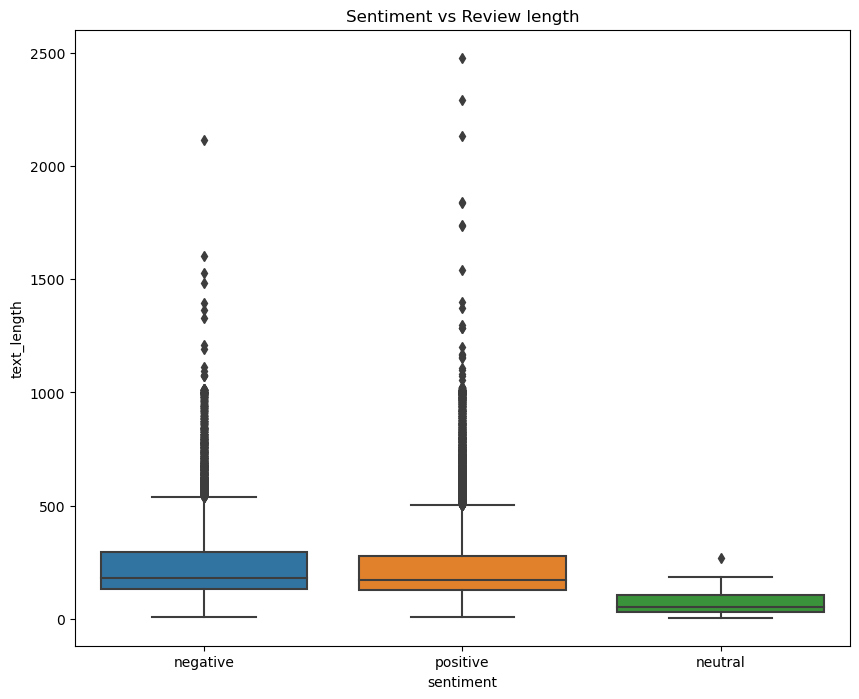

In [33]:
# there is almost no difference between in text length of review between Positive and Negative reviews
plt.figure(figsize=(10,8), dpi=100)
sns.boxplot(data=imdb, x='sentiment', y='text_length')
plt.title('Sentiment vs Review length');

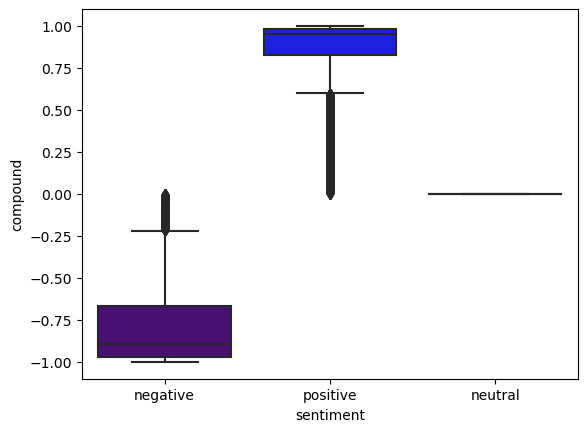

In [34]:
# to visualise 'sentiment' in boxplot style
sns.boxplot(data = imdb, y = 'compound', x='sentiment', palette=['#4B0082',"#0000FF", '#32CD32'])
plt.show()

In [35]:
# to check the counts in each category,'sentiment'
pd.DataFrame(imdb['sentiment'].value_counts())

,count
sentiment,
positive,32962
negative,17006
neutral,31


In [36]:
# 65.9% of the movie reviews are positive
100*imdb['sentiment'].value_counts()/len(imdb)

sentiment
positive    65.925319
negative    34.012680
neutral      0.062001
Name: count, dtype: float64

In [37]:
# to import word cloud library
from wordcloud import WordCloud

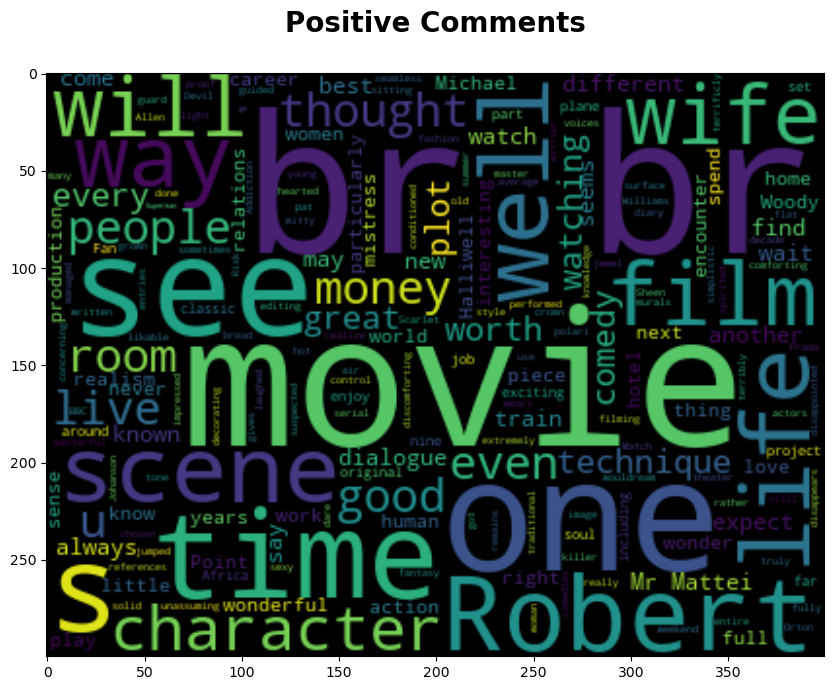

In [38]:
# Positive review word cloud
pos_wordcloud = WordCloud(width=400,
                     height=300,
                     random_state= 2,
                     max_font_size=100).generate(str(imdb[imdb['sentiment']=='positive']['review'].values))

plt.figure(figsize=(12,7), dpi=100)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Positive Comments\n', fontsize=20, fontweight='bold')
plt.tight_layout();

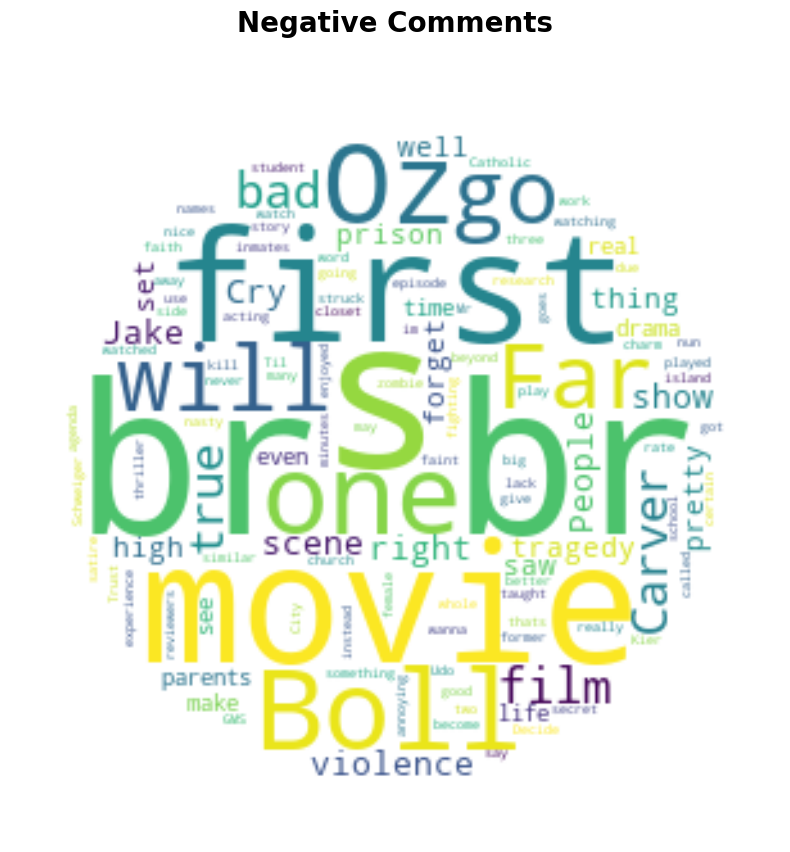

In [39]:
# Negative review wordcloud
x, y = np.ogrid[:300, :300]
mask = (x - 150)**2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color='white', repeat=True, mask=mask)
wc.generate(str(imdb[imdb['sentiment']=='negative']['review'].values))

plt.figure(figsize=(12,10), dpi=100)
plt.axis('off')
plt.title('Negative Comments\n', fontsize=20, fontweight='bold')
plt.imshow(wc, interpolation='bilinear');

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

In [41]:
# instantiate a basic vectoriser with only settings for extracting uni-grams
cvec = CountVectorizer(stop_words = list(ENGLISH_STOP_WORDS), ngram_range=(1,1))

In [42]:
# fit/transform count vectoriser to comments and get the 50 words with the highest count
vec_positive = cvec.fit_transform(imdb[imdb['sentiment']=='positive']['review'])
vec_positive = pd.DataFrame(vec_positive.toarray(), columns = cvec.get_feature_names_out())
positive_50 = vec_positive.sum().sort_values(ascending=False).head(50)

vec_negative = cvec.fit_transform(imdb[imdb['sentiment']=='negative']['review'])
vec_negative = pd.DataFrame(vec_negative.toarray(), columns = cvec.get_feature_names_out())
negative_50 = vec_negative.sum().sort_values(ascending=False).head(50)

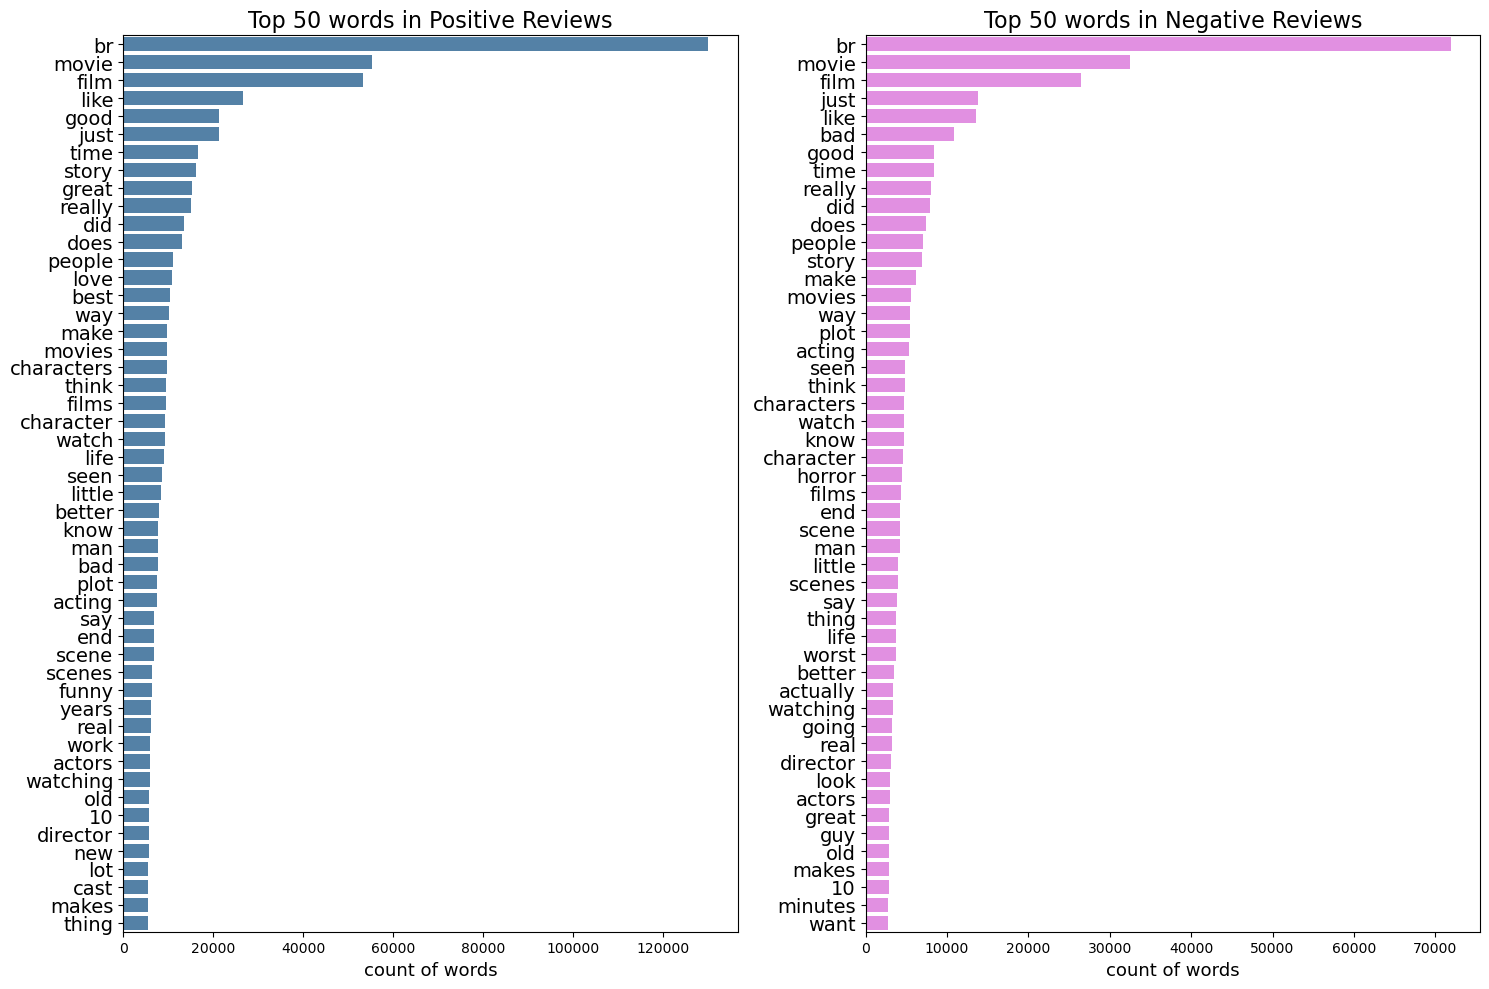

In [43]:
# plot results
fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10))

sns.barplot(y=positive_50.index.values, x = positive_50, color='steelblue', ax=ax[0])
ax[0].set_title('Top 50 words in Positive Reviews',fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

sns.barplot(y=negative_50.index.values, x = negative_50, color='violet', ax=ax[1])
ax[1].set_title('Top 50 words in Negative Reviews',fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

In [44]:
# it can be observed that both Positive and Negative reviews contains similar set of words: 
# words such as br, movie, people, 10, make, think, film, does, way, need, does, will be added to a list of stop words for
# text-preprocessing

In [45]:
# to convert review all to lower case
imdb['review'] = imdb['review'].astype(str).str.lower()
imdb.head()

,review,language,text_length,neg,neu,pos,compound,sentiment
0,one of the other reviewers has mentioned that ...,en,313,0.200,0.752,0.048,-0.9951,negative
1,a wonderful little production. <br /><br />the...,en,163,0.053,0.776,0.172,0.9641,positive
2,i thought this was a wonderful way to spend ti...,en,168,0.094,0.714,0.192,0.9605,positive
3,basically there's a family where a little boy ...,en,139,0.137,0.798,0.065,-0.9213,negative
4,"petter mattei's ""love in the time of money"" is...",en,230,0.052,0.801,0.147,0.9744,positive


In [46]:
# to import a library that removes punctuations from the reviews
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
# to define a function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [48]:
#storing the puntuation free text
imdb['review']= imdb['review'].apply(lambda x:remove_punctuation(x))

In [49]:
# to remove all punctuations from movie reviews
imdb['review'] = imdb['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
imdb.head()

,review,language,text_length,neg,neu,pos,compound,sentiment
0,one of the other reviewers has mentioned that ...,en,313,0.200,0.752,0.048,-0.9951,negative
1,a wonderful little production br br the filmin...,en,163,0.053,0.776,0.172,0.9641,positive
2,i thought this was a wonderful way to spend ti...,en,168,0.094,0.714,0.192,0.9605,positive
3,basically theres a family where a little boy j...,en,139,0.137,0.798,0.065,-0.9213,negative
4,petter matteis love in the time of money is a ...,en,230,0.052,0.801,0.147,0.9744,positive


In [50]:
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

In [51]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]\w+')

In [52]:
# Run tokenizer on column 'selftext'
imdb['text_token'] = imdb['review'].apply(tokenizer.tokenize) 
imdb.head()

,review,language,text_length,neg,neu,pos,compound,sentiment,text_token
0,one of the other reviewers has mentioned that ...,en,313,0.200,0.752,0.048,-0.9951,negative,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production br br the filmin...,en,163,0.053,0.776,0.172,0.9641,positive,"[wonderful, little, production, br, br, the, f..."
2,i thought this was a wonderful way to spend ti...,en,168,0.094,0.714,0.192,0.9605,positive,"[thought, this, was, wonderful, way, to, spend..."
3,basically theres a family where a little boy j...,en,139,0.137,0.798,0.065,-0.9213,negative,"[basically, theres, family, where, little, boy..."
4,petter matteis love in the time of money is a ...,en,230,0.052,0.801,0.147,0.9744,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [53]:
# import libraries for Text-preprocessing
from nltk.corpus import stopwords

In [54]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [55]:
# Extend the list with your own custom stopwords
my_stopwords = ['br','would','could','need','time','movie','people','film','make','think','way','10','does','did']
stopwords.extend(my_stopwords)

In [56]:
# to Remove stopwords
imdb['text_token'] = imdb['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
imdb.head()

,review,language,text_length,neg,neu,pos,compound,sentiment,text_token
0,one of the other reviewers has mentioned that ...,en,313,0.200,0.752,0.048,-0.9951,negative,"[one, reviewers, mentioned, watching, oz, epis..."
1,a wonderful little production br br the filmin...,en,163,0.053,0.776,0.172,0.9641,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,en,168,0.094,0.714,0.192,0.9605,positive,"[thought, wonderful, spend, hot, summer, weeke..."
3,basically theres a family where a little boy j...,en,139,0.137,0.798,0.065,-0.9213,negative,"[basically, theres, family, little, boy, jake,..."
4,petter matteis love in the time of money is a ...,en,230,0.052,0.801,0.147,0.9744,positive,"[petter, matteis, love, money, visually, stunn..."


In [59]:
# to remove infrequent words, to change text_token to string and keep only words longer than 2 letters
imdb['text_string'] = imdb['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
imdb.head()

,review,language,text_length,neg,neu,pos,compound,sentiment,text_token,text_string
0,one of the other reviewers has mentioned that ...,en,313,0.200,0.752,0.048,-0.9951,negative,"[one, reviewers, mentioned, watching, oz, epis...",one reviewers mentioned watching episode hooke...
1,a wonderful little production br br the filmin...,en,163,0.053,0.776,0.172,0.9641,positive,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,en,168,0.094,0.714,0.192,0.9605,positive,"[thought, wonderful, spend, hot, summer, weeke...",thought wonderful spend hot summer weekend sit...
3,basically theres a family where a little boy j...,en,139,0.137,0.798,0.065,-0.9213,negative,"[basically, theres, family, little, boy, jake,...",basically theres family little boy jake thinks...
4,petter matteis love in the time of money is a ...,en,230,0.052,0.801,0.147,0.9744,positive,"[petter, matteis, love, money, visually, stunn...",petter matteis love money visually stunning wa...


In [60]:
# to create a list of all words
all_words = ' '.join([word for word in imdb['text_string']])

In [61]:
# to tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [62]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\miche\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
# Import lemmatizer. 
from nltk.stem import WordNetLemmatizer

In [64]:
# Instantiate lemmatizer. 
wordnet_lem = WordNetLemmatizer()

In [65]:
# to Lemmatize tokens
imdb['text_lem'] = imdb['text_string'].apply(wordnet_lem.lemmatize)
imdb.head()

,review,language,text_length,neg,neu,pos,compound,sentiment,text_token,text_string,text_lem
0,one of the other reviewers has mentioned that ...,en,313,0.200,0.752,0.048,-0.9951,negative,"[one, reviewers, mentioned, watching, oz, epis...",one reviewers mentioned watching episode hooke...,one reviewers mentioned watching episode hooke...
1,a wonderful little production br br the filmin...,en,163,0.053,0.776,0.172,0.9641,positive,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,en,168,0.094,0.714,0.192,0.9605,positive,"[thought, wonderful, spend, hot, summer, weeke...",thought wonderful spend hot summer weekend sit...,thought wonderful spend hot summer weekend sit...
3,basically theres a family where a little boy j...,en,139,0.137,0.798,0.065,-0.9213,negative,"[basically, theres, family, little, boy, jake,...",basically theres family little boy jake thinks...,basically theres family little boy jake thinks...
4,petter matteis love in the time of money is a ...,en,230,0.052,0.801,0.147,0.9744,positive,"[petter, matteis, love, money, visually, stunn...",petter matteis love money visually stunning wa...,petter matteis love money visually stunning wa...


In [66]:
# Instantiate stemmer.
from nltk.stem.porter import PorterStemmer

In [67]:
# Instantiate object of class PorterStemmer.
ps = PorterStemmer()

In [68]:
# to stem tokens.
imdb['text_stem'] = imdb['text_lem'].apply(ps.stem)
imdb.head()

,review,language,text_length,neg,neu,pos,compound,sentiment,text_token,text_string,text_lem,text_stem
0,one of the other reviewers has mentioned that ...,en,313,0.200,0.752,0.048,-0.9951,negative,"[one, reviewers, mentioned, watching, oz, epis...",one reviewers mentioned watching episode hooke...,one reviewers mentioned watching episode hooke...,one reviewers mentioned watching episode hooke...
1,a wonderful little production br br the filmin...,en,163,0.053,0.776,0.172,0.9641,positive,"[wonderful, little, production, filming, techn...",wonderful little production filming technique ...,wonderful little production filming technique ...,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,en,168,0.094,0.714,0.192,0.9605,positive,"[thought, wonderful, spend, hot, summer, weeke...",thought wonderful spend hot summer weekend sit...,thought wonderful spend hot summer weekend sit...,thought wonderful spend hot summer weekend sit...
3,basically theres a family where a little boy j...,en,139,0.137,0.798,0.065,-0.9213,negative,"[basically, theres, family, little, boy, jake,...",basically theres family little boy jake thinks...,basically theres family little boy jake thinks...,basically theres family little boy jake thinks...
4,petter matteis love in the time of money is a ...,en,230,0.052,0.801,0.147,0.9744,positive,"[petter, matteis, love, money, visually, stunn...",petter matteis love money visually stunning wa...,petter matteis love money visually stunning wa...,petter matteis love money visually stunning wa...


In [69]:
# to apply topic modelling to the clean dataset
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
# the vectorizer object will be used to transform text to vector form
# to filter out words max_df=0.9, to discard any words that appear in > 90% of reviews
# to filter words using min_df=25, words that appear in less than 25 reviews will be discarded
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

In [71]:
# apply transformation
tf = vectorizer.fit_transform(imdb['text_stem']).toarray()

In [72]:
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names_out()

In [73]:
from sklearn.decomposition import LatentDirichletAllocation

In [74]:
number_of_topics = 7

In [75]:
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [76]:
model.fit(tf)

LatentDirichletAllocation(n_components=7, random_state=0)

In [77]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [78]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights
0,like,14785.1,show,9442.2,one,3931.0,one,4355.2,one,8233.8,one,5433.3,one,7206.0
1,one,13857.5,like,8933.0,good,2652.8,great,2208.8,story,5001.6,life,4987.3,good,6308.7
2,bad,13036.3,one,7277.2,get,2325.3,best,2204.2,films,4788.3,story,4975.7,like,4962.0
3,even,10437.2,good,6901.5,like,2255.5,like,2084.5,also,3540.2,love,4918.8,great,4614.6
4,really,8250.3,really,6120.5,gets,2159.6,also,1953.4,characters,3475.6,man,3339.0,characters,4306.3
5,good,7905.7,great,5749.1,also,2011.9,years,1868.0,war,3335.2,family,3077.9,much,4305.0
6,movies,6993.8,see,5721.1,man,1870.0,music,1657.7,like,3316.2,young,2959.8,comedy,4257.3
7,get,6867.2,first,4812.2,killer,1718.4,good,1620.3,many,3305.5,woman,2730.0,really,4095.5
8,see,6829.9,watch,4609.5,hes,1713.9,john,1613.3,much,3301.1,father,2634.1,funny,4081.6
9,acting,6256.5,series,4391.6,horror,1662.7,films,1580.9,world,3174.4,two,2536.4,story,4038.7


In [ ]:
# from the topics, it can be observed that characters played in the movie, their acting, storyline or plot are the reasons for 
# either positive or negative consumer reviews